# importing libraries

In [1]:
# importing the variables from preprocessing
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r classes

In [19]:
# importing libraries
import numpy as np
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [3]:
# importing packages of sklearn
from sklearn.neighbors import KNeighborsClassifier

In [7]:
# model evaluation packages
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Training model using KNN

In [5]:
k = 3 # number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
y_pred = knn.predict(X_test)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Evaluation of KNN model

In [29]:
# calculate f1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score: ",f1)

F1-score:  0.9703749561556656


In [9]:
# calculate accuraccy
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.9705


In [30]:
# calculate recall
recall = recall_score(y_test,y_pred,average='macro')
print("Recall: ",recall)

Recall:  0.9701144344783679


In [31]:
# calculate precision
precision = precision_score(y_test,y_pred,average='macro')
print("Precision: ",precision)

Precision:  0.9709116052270813


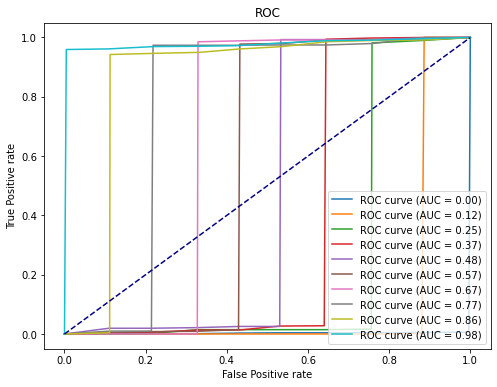

In [26]:
# calculate the roc

# convert the labels to one-hot encoded format
y_test_encoded = label_binarize(y_test,classes=classes)

# compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:,i],y_pred)
    roc_auc[i]=auc(fpr[i],tpr[i])

# plot the Roc curve for each class
plt.figure(figsize=(8,6))
for i in range(len(classes)):
    plt.plot(fpr[i],tpr[i], label='ROC curve (AUC = %0.2f)' % roc_auc[i])
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [27]:
# confusion matric
cm = confusion_matrix(y_test,y_pred)

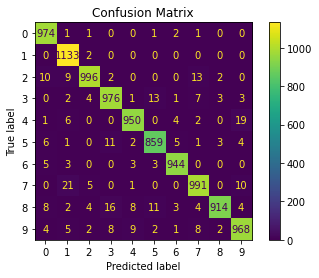

In [28]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= classes)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()